In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import data
df = pd.read_csv('../../data/day_2/boston_housing/housing_data.csv')

# Load CSV with proper parsing
data = pd.read_csv(
    "/home/data/day_2/vow.csv",
    parse_dates=["Date"],
    dayfirst=False,
    thousands=",",
)

df, data

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   
 
      PTRATIO       B  LSTAT  MEDV  
 0       15.3  396.90   4.98  24.0  
 1       17.8  396.90   9.14  21.6  

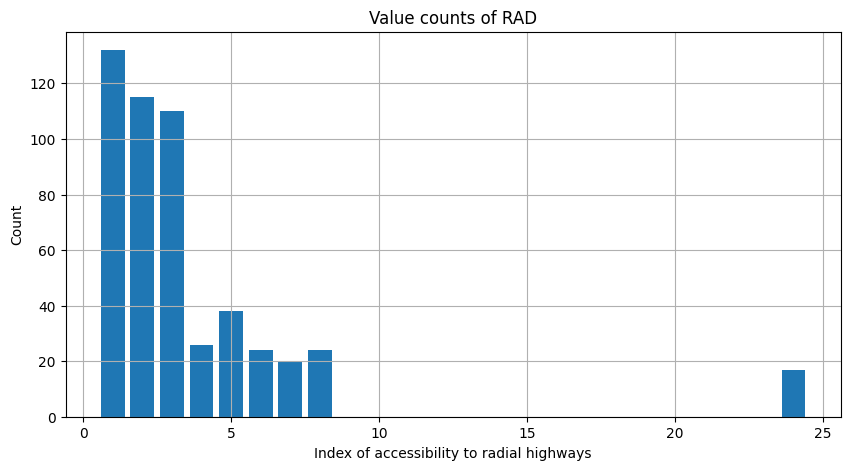

In [3]:
# 1. Barplot (univariate)

# data
x = df['RAD'].unique()
height = df['RAD'].value_counts(dropna=False)

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=x, height=height)
ax.set_title('Value counts of RAD')
ax.set_xlabel('Index of accessibility to radial highways')
ax.set_ylabel('Count')
plt.grid()
plt.show()

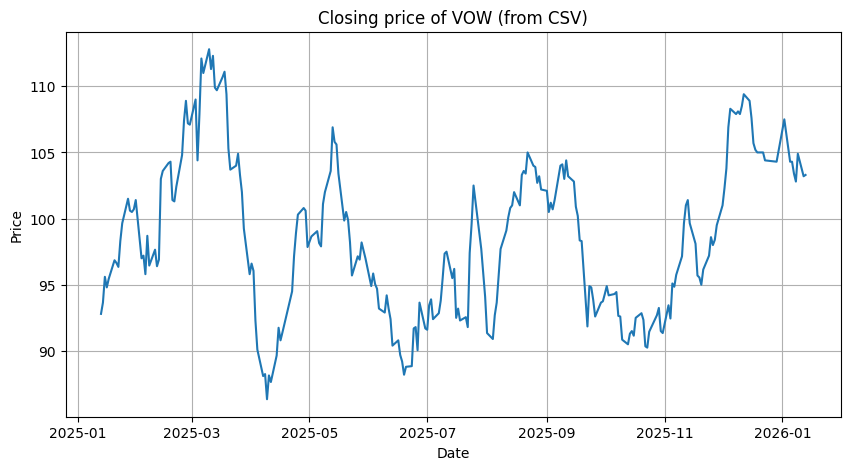

In [4]:
# 2. Lineplot (univariate)

# Use Date as index and sort
data = data.set_index("Date").sort_index()

# Plot closing price
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data["Close"])
ax.set_title("Closing price of VOW (from CSV)")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.grid(True)
plt.show()

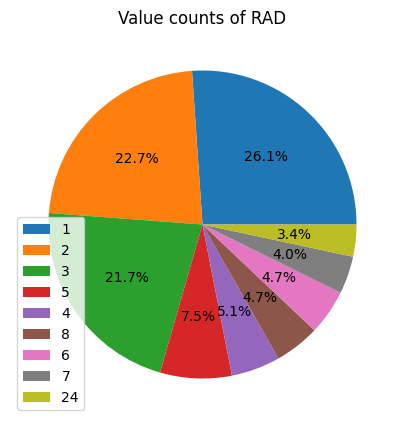

In [5]:
# 3. Pieplot (univariate)

# data
x = df['RAD'].value_counts(dropna=False)
labels = df['RAD'].unique()

# plot
fig, ax = plt.subplots(figsize=(10,5))
wedges, texts, autotexts = ax.pie(
    x, 
    labels=None,
    autopct='%1.1f%%'
)
ax.legend(wedges, labels)
ax.set_title('Value counts of RAD')
plt.show()

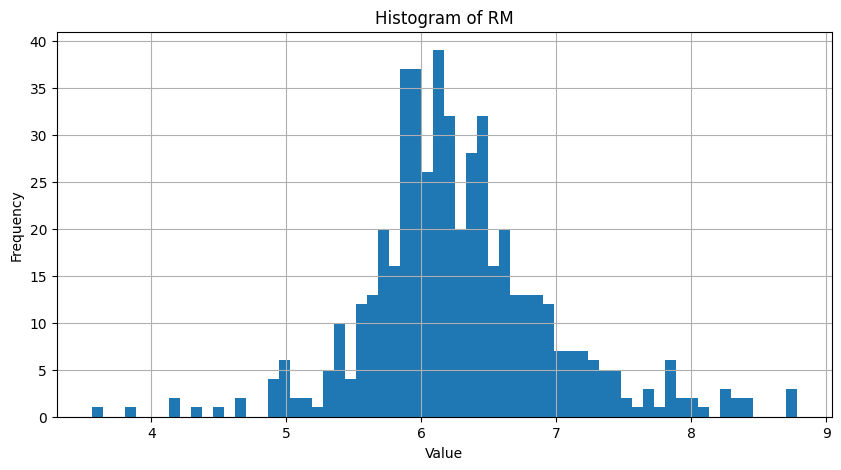

In [6]:
# 4. Histogram (univariate)

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df["RM"], bins=64)
ax.set_title('Histogram of RM')
ax.set_ylabel('Frequency')
ax.set_xlabel('Value')
plt.grid()
plt.show()

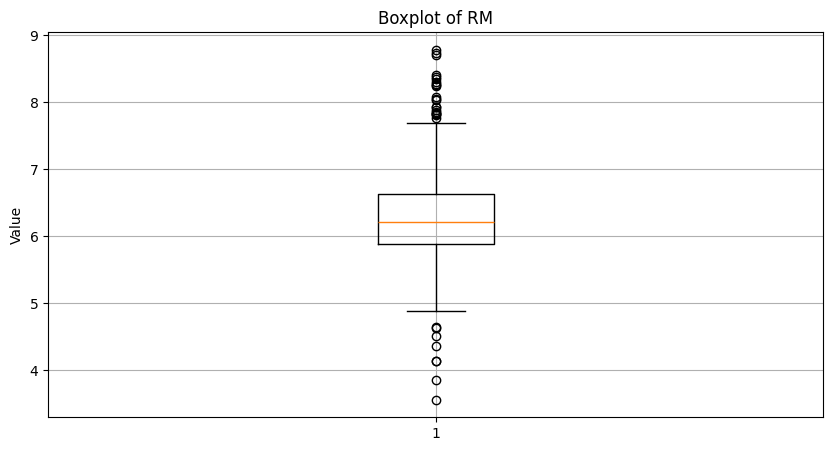

In [7]:
# 5. Boxplot (univariate)

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(df["RM"])
ax.set_title('Boxplot of RM')
ax.set_ylabel('Value')
plt.grid()
plt.show()

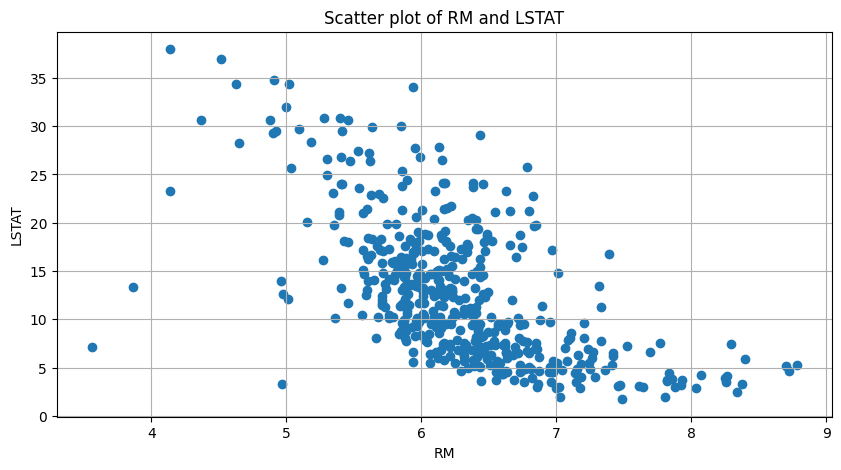

In [8]:
# 6.a Scatter plot (bivariate)

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df["RM"], df["LSTAT"])
ax.set_title('Scatter plot of RM and LSTAT')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
plt.grid()
plt.show()

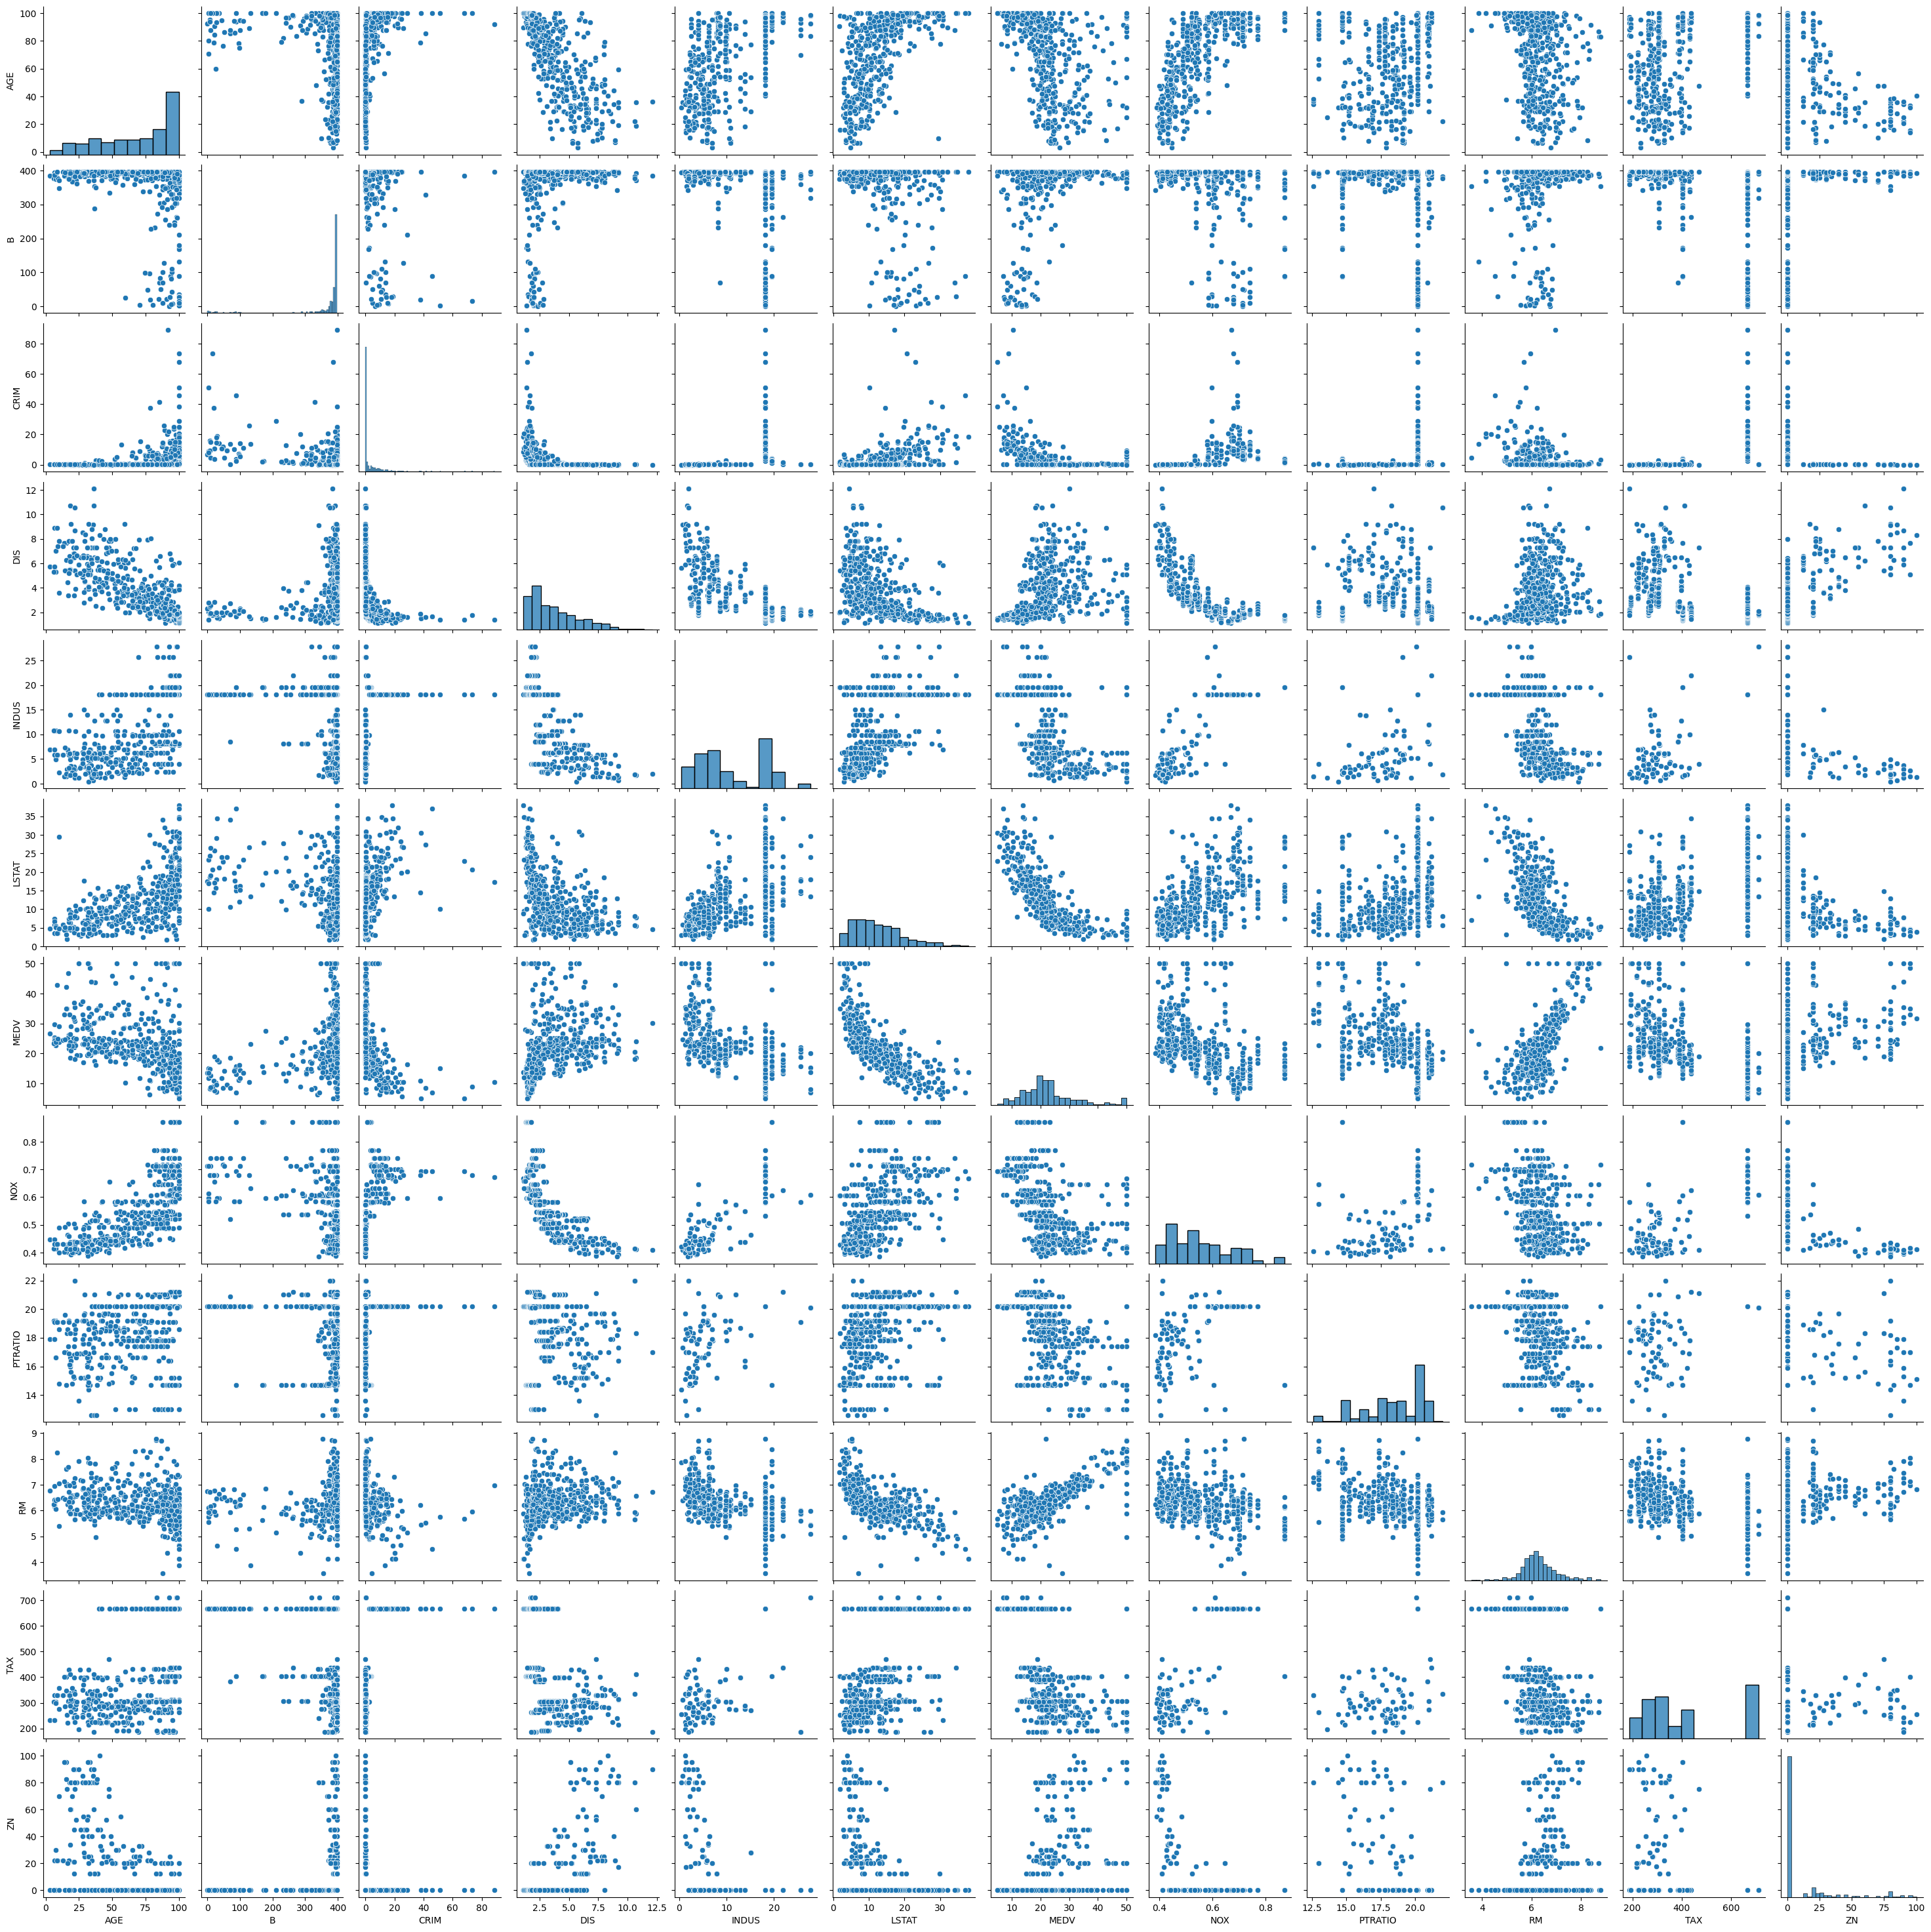

In [9]:
# 6.b Seaborn scatterplot on every quantitative variable

# plot
sns.pairplot(df[df.columns.difference(['CHAS', 'RAD'])])
plt.show()

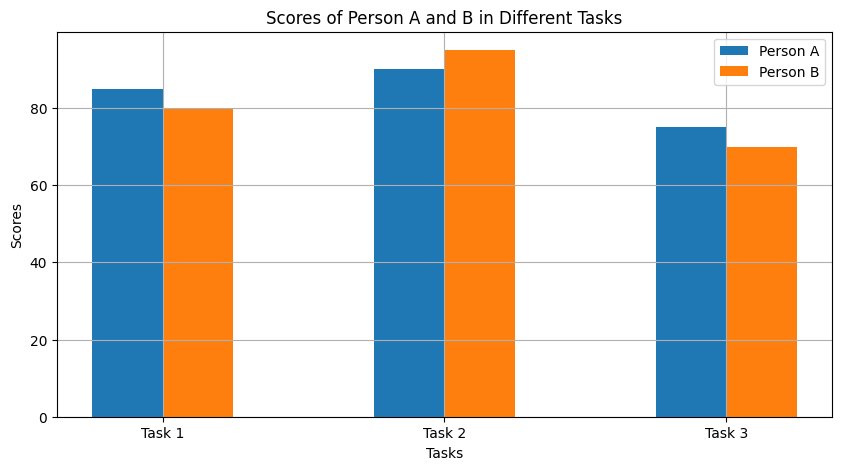

In [10]:
# 7. Barplot (bivariate)

# data
tasks = ['Task 1', 'Task 2', 'Task 3']
scores_A = [85, 90, 75]
scores_B = [80, 95, 70]
x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
bars_A = ax.bar(x - width/2, scores_A, width, label='Person A')
bars_B = ax.bar(x + width/2, scores_B, width, label='Person B')
ax.set_xlabel('Tasks')
ax.set_ylabel('Scores')
ax.set_title('Scores of Person A and B in Different Tasks')
ax.set_xticks(x)
ax.set_xticklabels(tasks)
plt.grid()
ax.legend()

plt.show()

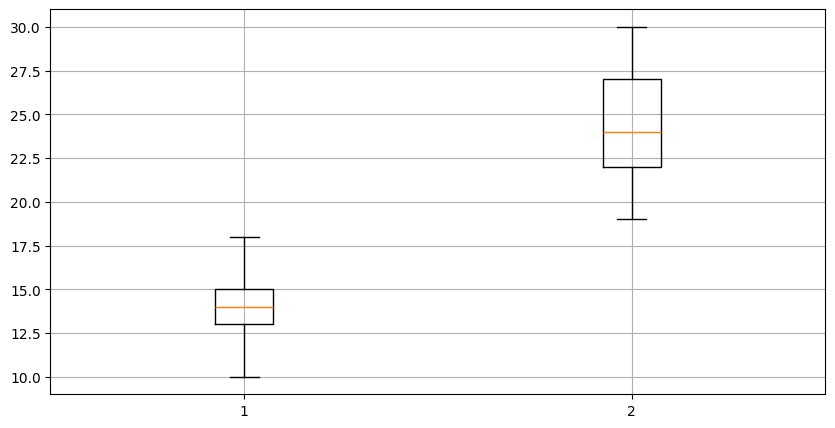

In [11]:
# 8. Boxplot (biivariate)

# data
data_A = [12, 15, 14, 10, 13, 16, 18, 15, 14]
data_B = [20, 22, 19, 25, 30, 28, 24, 23, 27]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot([data_A, data_B])
plt.grid()
plt.show()

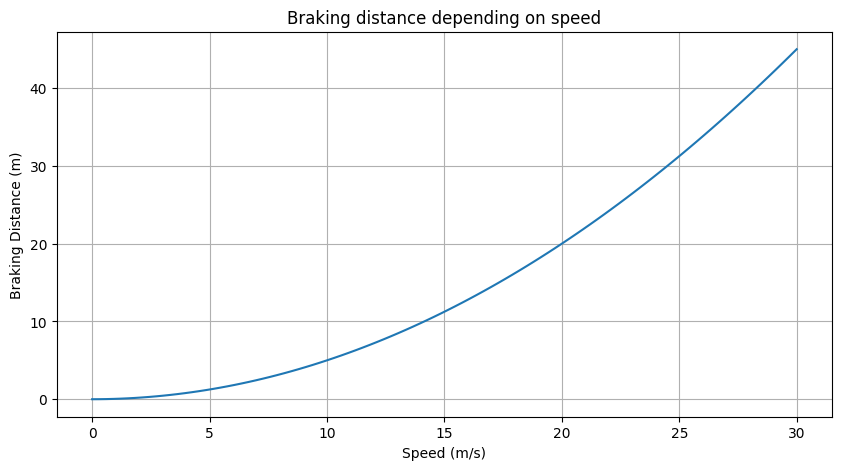

In [12]:
# 9. Lineplot (bivariate)

v = np.linspace(0, 30, 100)
k = 0.05
s = k * v**2

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(v, s)
ax.set_title('Braking distance depending on speed')
ax.set_xlabel('Speed (m/s)')
ax.set_ylabel('Braking Distance (m)')
ax.grid(True)
plt.show()

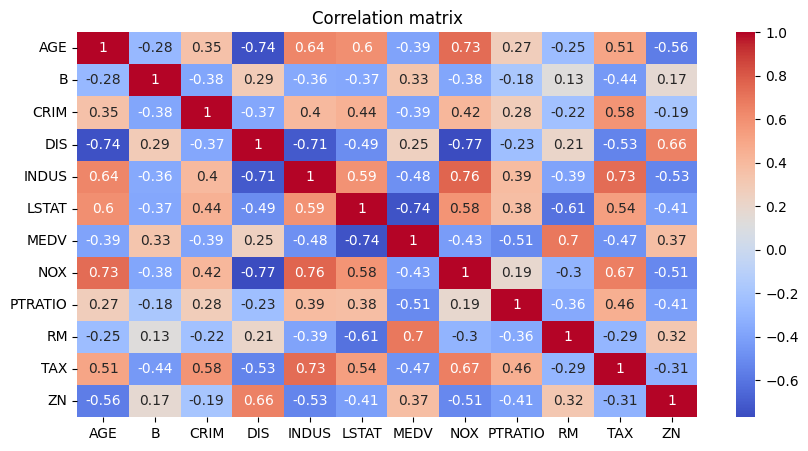

In [13]:
# 10. Correlation heatmap

# data
corr_matrix = df[df.columns.difference(['CHAS', 'RAD'])].corr()

# plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
ax.set_title('Correlation matrix')
plt.show()

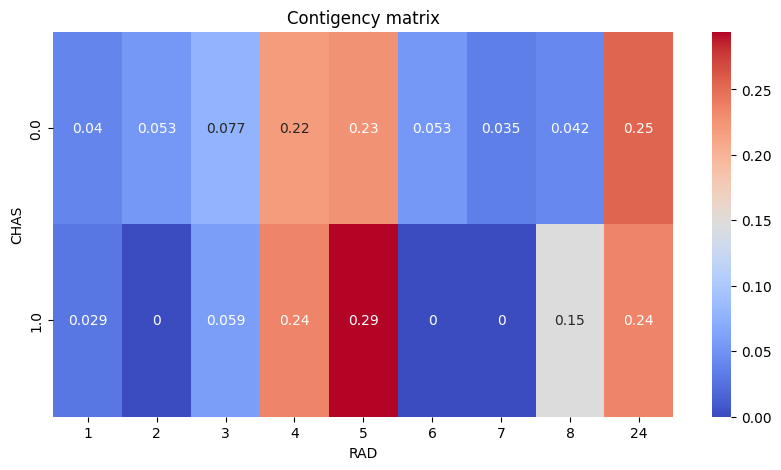

In [14]:
# 11. Contigency heatmap

# data
contingency_matrix = pd.crosstab(df['CHAS'], df['RAD'], normalize="index")

# plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(contingency_matrix, annot=True, cmap='coolwarm')
ax.set_title('Contigency matrix')
plt.show()